#### This file is created to analyze the EC citation data. In particular, citation index is defined to represent the quality of a conference. Formally,

$$citation_{year,k} = \frac{average \ number \ of \ citation \ by \ all \ papers \ in \ year}{average \ number \ of \ citation \ by \ top \ k \ percent \ cited \ papers \ in \ year}$$


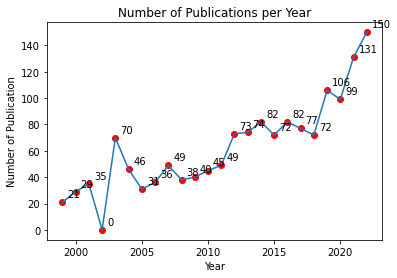

In [1]:
## Plot the number of publication per year

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC/EC_July_25.csv')

# Group the data by the "year" column and count the number of rows for each year
year_counts = df.groupby('Year').size()

# Create a list of years from 1999 to 2022
years = list(range(1999, 2023))

# Create a list of row counts for each year, using 0 if a year is missing
row_counts = [year_counts.get(year, 0) for year in years]

# Plot the row counts against each year
plt.plot(years, row_counts)
plt.xlabel('Year')
plt.ylabel('Number of Publication')
plt.title('Number of Publications per Year')

# Annotate the number of rows alongside each point
for i, count in enumerate(row_counts):
    plt.annotate(str(count), xy=(years[i], count), xytext=(5, 5), textcoords='offset points')
    plt.scatter(years[i], count, color='red')

plt.savefig("Number_of_publication.png")

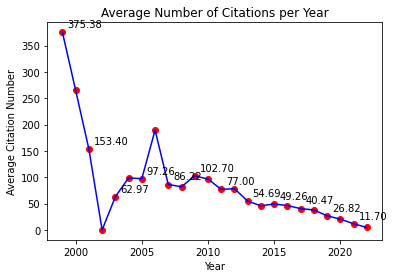

In [3]:
## Plot the average number of citation per year

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC/EC_July_25.csv')

# Group the data by the "year" column and calculate the average citation number for each year
year_avg_citations = df.groupby('Year')['Citation_Number'].mean()

# Create a list of years from 1999 to 2022
years = list(range(1999, 2023))

# Create a list of average citation numbers for each year, using 0 if a year is missing
avg_citations = [year_avg_citations.get(year, 0) for year in years]

# Plot the average citation numbers against each year
plt.plot(years, avg_citations, color='blue')
plt.scatter(years, avg_citations, color='red')
plt.xlabel('Year')
plt.ylabel('Average Citation Number')
plt.title('Average Number of Citations per Year')

# Annotate each odd year
for i, avg_citation in enumerate(avg_citations):
    if years[i] % 2 != 0:
        plt.annotate(f'{avg_citation:.2f}', xy=(years[i], avg_citation), xytext=(5, 5), textcoords='offset points')

plt.savefig("Average_Number_of_Citations.png")

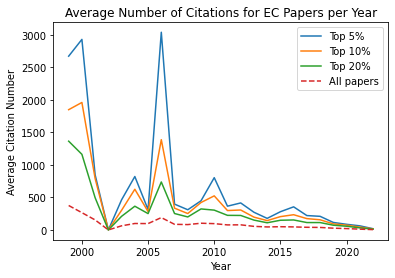

In [8]:
## Average number of publication with different cutoffs


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC/EC_July_25.csv')

# Group the data by the "year" column and calculate the average citation number for each year
year_avg_citations = df.groupby('Year')['Citation_Number'].mean()
# Create a list of average citation numbers for each year, using 0 if a year is missing
avg_citations = [year_avg_citations.get(year, 0) for year in years]

# Create a list of years from 1999 to 2022
years = list(range(1999, 2023))

# Initialize a list to store the average citation numbers of the top papers each year
top_paper_avg_citations_20 = []
top_paper_avg_citations_10 = []
top_paper_avg_citations_5 = []

# Iterate over each year
for year in years:
    # Filter the data for the current year
    year_data = df[df['Year'] == year]

    # Count the number of papers published in the current year
    num_papers = len(year_data)

    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_20 = int(num_papers * 0.2)
        if num_top_papers_20 < 1:
            num_top_papers_20 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data_20 = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_20 = sorted_data_20.head(num_top_papers_20)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_20 = top_papers_20['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_20.append(top_papers_avg_citation_20)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_20.append(0)
    
    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_10 = int(num_papers * 0.1)
        if num_top_papers_10 < 1:
            num_top_papers_10 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data_10 = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_10 = sorted_data_10.head(num_top_papers_10)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_10 = top_papers_10['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_10.append(top_papers_avg_citation_10)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_10.append(0)
    
    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_5 = int(num_papers * 0.05)
        if num_top_papers_5 < 1:
            num_top_papers_5 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data_5 = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_5 = sorted_data_5.head(num_top_papers_5)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_5 = top_papers_5['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_5.append(top_papers_avg_citation_5)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_5.append(0)

    

# Plot the average citation numbers of the top papers each year
plt.plot(years, top_paper_avg_citations_5, label= 'Top 5%')
plt.plot(years, top_paper_avg_citations_10, label = 'Top 10%')
plt.plot(years, top_paper_avg_citations_20, label = 'Top 20%')
plt.xlabel('Year')
plt.ylabel('Average Citation Number')
plt.title('Average Number of Citations for EC Papers per Year')

# Plot the average citation numbers for all papers each year
plt.plot(years, avg_citations, linestyle='--', label = 'All papers')
plt.legend()

plt.show()

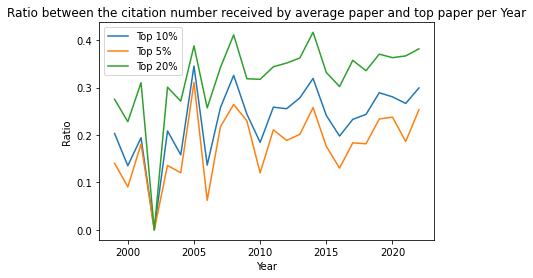

In [4]:
## Citation index with different cutoffs


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC/EC_July_25.csv')

# Group the data by the "year" column and calculate the average citation number for each year
year_avg_citations = df.groupby('Year')['Citation_Number'].mean()
# Create a list of average citation numbers for each year, using 0 if a year is missing
avg_citations = [year_avg_citations.get(year, 0) for year in years]

# Create a list of years from 1999 to 2022
years = list(range(1999, 2023))

# Initialize a list to store the average citation numbers of the top papers each year
top_paper_avg_citations_10 = []
top_paper_avg_citations_20 = []
top_paper_avg_citations_5 = []

# Iterate over each year
for year in years:
    # Filter the data for the current year
    year_data = df[df['Year'] == year]

    # Count the number of papers published in the current year
    num_papers = len(year_data)

    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_10 = int(num_papers * 0.1)
        if num_top_papers_10 < 1:
            num_top_papers_10 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_10 = sorted_data.head(num_top_papers_10)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_10 = top_papers_10['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_10.append(top_papers_avg_citation_10)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_10.append(0)
    
    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_20 = int(num_papers * 0.2)
        if num_top_papers_20 < 1:
            num_top_papers_20 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_20 = sorted_data.head(num_top_papers_20)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_20 = top_papers_20['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_20.append(top_papers_avg_citation_20)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_20.append(0)

    if num_papers > 0:
        # Calculate the number of papers to select (top 10%)
        num_top_papers_5 = int(num_papers * 0.05)
        if num_top_papers_5 < 1:
            num_top_papers_5 = 1

        # Sort the papers based on citation numbers in descending order
        sorted_data = year_data.sort_values('Citation_Number', ascending=False)

        # Select the top papers with the most citations
        top_papers_5 = sorted_data.head(num_top_papers_5)

        # Calculate the average citation for the top papers
        top_papers_avg_citation_5 = top_papers_5['Citation_Number'].mean()

        # Add the average citation to the list
        top_paper_avg_citations_5.append(top_papers_avg_citation_5)
    else:
        # No publications in the current year, so average citation is 0
        top_paper_avg_citations_5.append(0)

ratio_10 = []
for i in range(len(avg_citations)):
    if (top_paper_avg_citations_10[i] != 0):
        ratio_10.append(avg_citations[i]/top_paper_avg_citations_10[i])
    else:
        ratio_10.append(0)

ratio_5 = []
for i in range(len(avg_citations)):
    if (top_paper_avg_citations_5[i] != 0):
        ratio_5.append(avg_citations[i]/top_paper_avg_citations_5[i])
    else:
        ratio_5.append(0)

ratio_20 = []
for i in range(len(avg_citations)):
    if (top_paper_avg_citations_20[i] != 0):
        ratio_20.append(avg_citations[i]/top_paper_avg_citations_20[i])
    else:
        ratio_20.append(0)


# Plot the average citation numbers of the top papers each year
plt.plot(years, ratio_10, label= "Top 10%")
plt.plot(years, ratio_5, label= "Top 5%")
plt.plot(years, ratio_20, label= "Top 20%")
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio between the citation number received by average paper and top paper per Year')
plt.legend()


plt.savefig("Raio.png")